# HW 2: Wrangling

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#1
abb = pd.read_csv ('/data/airbnb_hw.csv')
print(abb['Price'].unique()) #only notice commas
abb['Price_clean'] = abb['Price'].str.replace(',', '') #removes comma and replaces with nothing
abb['Price_clean'] = pd.to_numeric(abb['Price_clean']) #converts to numeric
abb["Price_missing"] = abb['Price_clean'].isnull()
print ('missing:', sum(abb['Price_missing'])) #0 remeaining missing values

['145' '37' '28' '199' '549' '149' '250' '90' '270' '290' '170' '59' '49'
 '68' '285' '75' '100' '150' '700' '125' '175' '40' '89' '95' '99' '499'
 '120' '79' '110' '180' '143' '230' '350' '135' '85' '60' '70' '55' '44'
 '200' '165' '115' '74' '84' '129' '50' '185' '80' '190' '140' '45' '65'
 '225' '600' '109' '1,990' '73' '240' '72' '105' '155' '160' '42' '132'
 '117' '295' '280' '159' '107' '69' '239' '220' '399' '130' '375' '585'
 '275' '139' '260' '35' '133' '300' '289' '179' '98' '195' '29' '27' '39'
 '249' '192' '142' '169' '1,000' '131' '138' '113' '122' '329' '101' '475'
 '238' '272' '308' '126' '235' '315' '248' '128' '56' '207' '450' '215'
 '210' '385' '445' '136' '247' '118' '77' '76' '92' '198' '205' '299'
 '222' '245' '104' '153' '349' '114' '320' '292' '226' '420' '500' '325'
 '307' '78' '265' '108' '123' '189' '32' '58' '86' '219' '800' '335' '63'
 '229' '425' '67' '87' '1,200' '158' '650' '234' '310' '695' '400' '166'
 '119' '62' '168' '340' '479' '43' '395' '144' '52' 

In [62]:
#2
mn = pd.read_csv ('/data/mn_police_use_of_force.csv')

print(mn['subject_injury'].unique())
print(mn['subject_injury'].value_counts(), '\n')
mn['subject_injury'] = mn['subject_injury'].replace(np.nan, 'Missing')
print(mn['subject_injury'].value_counts(), '\n')
print('total included:', mn['subject_injury'].value_counts()[0]+mn['subject_injury'].value_counts()[1])
print ('missing:', mn['subject_injury'].value_counts()[2]) #9848 missing: 3077 included
pd.crosstab(mn['subject_injury'], mn['force_type'])
#Data missing throughout, but 'Less lethal' and 'Maximal restraint technique' have only missing values.

[nan 'No' 'Yes']
subject_injury
Yes    1631
No     1446
Name: count, dtype: int64 

subject_injury
Missing    9848
Yes        1631
No         1446
Name: count, dtype: int64 

total included: 11479
missing: 1446


/tmp/ipython-input-3751828220.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('total included:', mn['subject_injury'].value_counts()[0]+mn['subject_injury'].value_counts()[1])
/tmp/ipython-input-3751828220.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('total included:', mn['subject_injury'].value_counts()[0]+mn['subject_injury'].value_counts()[1])
/tmp/ipython-input-3751828220.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use 

force_type,Baton,Bodily Force,Chemical Irritant,Firearm,Gun Point Display,Improvised Weapon,Less Lethal,Less Lethal Projectile,Maximal Restraint Technique,Police K9 Bite,Taser
subject_injury,,,,,,,,,,,
Missing,2,7051,1421,0,27,74,87,0,170,31,985
No,0,1093,131,2,33,34,0,1,0,2,150
Yes,2,1286,41,0,44,40,0,2,0,44,172


In [95]:
#3
pt = pd.read_parquet('/data/justice_data.parquet')
print(pt['WhetherDefendantWasReleasedPretrial'].unique())
print(pt['WhetherDefendantWasReleasedPretrial'].value_counts(), '\n')
pt['released'] = pt['WhetherDefendantWasReleasedPretrial']
pt['released'] = pt['released'].astype('string') #type to string
pt['released'] = pt['released'].str.replace('0', 'No') #converts 1 to no not released
pt['released'] = pt['released'].str.replace('1', 'Yes') #converts 1 to yes released
pt = pt.replace('9', np.nan) #converts 9 to nan
print(pt['released'].unique())
print(pt['released'].value_counts())

[9 0 1]
WhetherDefendantWasReleasedPretrial
1    19154
0     3801
9       31
Name: count, dtype: int64 

<StringArray>
[<NA>, 'No', 'Yes']
Length: 3, dtype: string
released
Yes    19154
No      3801
Name: count, dtype: Int64


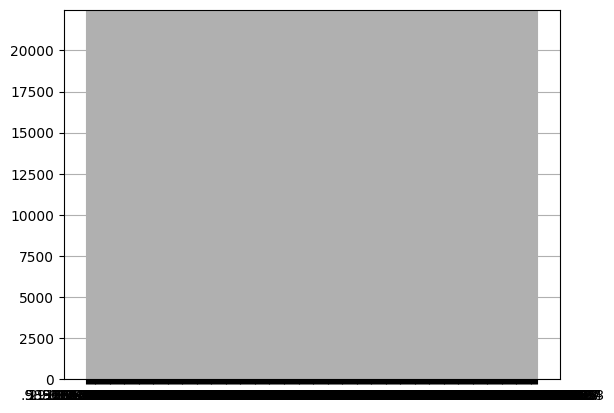

In [140]:
#4
pt['imposed'] = pt['ImposedSentenceAllChargeInContactEvent']
pt['ImposedSentenceAllChargeInContactEvent'].hist()
plt.show()
pt['type'] = pt['SentenceTypeAllChargesAtConvictionInContactEvent']
pt.loc[pt['type']==4, 'imposed'] = np.nan #4 is Other, all charges in cohort contact resulted in pending, dismissed,deferred, etc.
pt.loc[pt['type']==9, 'imposed'] = np.nan #9 is na(e.g., disposition record not found, or unknown)\
abb["Price_missing"] = abb['Price_clean'].isna()
print ('missing:', sum(abb['Price_missing'])) #0 remeaining missing values
print(pt['imposed'].hist())
plt.show()
pt['type'].unique()



**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

In [ ]:
#1


#2


#3


#4


#5


#6


#7


#8


#9

**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?